In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('Darussalam.csv',encoding = "cp1252")

In [3]:
print(df.head())
print(df.columns)

         Date  Time   SO2     NO    NO2    NOX    CO    O3  PM25    PM10  \
0  2016-10-01     1  0.57  13.84   9.22  23.06  1.76  1.12   NaN  124.34   
1  2016-10-01     2  0.29  17.45  11.89  29.34  1.67  1.03   NaN   69.42   
2  2016-10-01     3  0.07  12.93   6.20  19.13  1.60  1.13   NaN   83.36   
3  2016-10-01     4  0.08   9.69   0.92  10.61  1.54  1.05   NaN   60.51   
4  2016-10-01     5  0.07    NaN    NaN   1.97  1.48  0.99   NaN   43.51   

   Temperature     RH  Solar Rad       BP  Rain  
0        29.48  80.56       7.99  1006.15   NaN  
1        29.01  82.86       8.06  1006.05   NaN  
2        28.84  83.68       8.19  1006.01  0.02  
3        28.75  84.18       8.18  1006.14   NaN  
4        28.53  85.12       8.20  1006.36   NaN  
Index(['Date', 'Time', 'SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM25', 'PM10',
       'Temperature', 'RH', 'Solar Rad', 'BP', 'Rain'],
      dtype='object')


In [4]:
df.dtypes

Date            object
Time             int64
SO2            float64
NO             float64
NO2            float64
NOX            float64
CO             float64
O3             float64
PM25           float64
PM10           float64
Temperature    float64
RH             float64
Solar Rad      float64
BP             float64
Rain           float64
dtype: object

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [6]:
df.shape

(21888, 15)

In [7]:
from datetime import datetime
#df['Date']=pd.to_datetime(df['Date'])
time=pd.to_datetime(df['Date'])

In [8]:
tf=pd.DataFrame()

In [9]:
tf['DateTime']=time
df['Year']=tf.DateTime.dt.year
df['Month']=tf.DateTime.dt.month
df['Day']=tf.DateTime.dt.day
df['Week_Day']=tf.DateTime.dt.weekday_name

In [10]:
df.head()

,Date,Time,SO2,NO,NO2,NOX,CO,O3,PM25,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day,Week_Day
0,2016-10-01,1,0.57,13.84,9.22,23.06,1.76,1.12,NaN,124.34,29.48,80.56,7.99,1006.15,NaN,2016,10,1,Saturday
1,2016-10-01,2,0.29,17.45,11.89,29.34,1.67,1.03,NaN,69.42,29.01,82.86,8.06,1006.05,NaN,2016,10,1,Saturday
2,2016-10-01,3,0.07,12.93,6.20,19.13,1.60,1.13,NaN,83.36,28.84,83.68,8.19,1006.01,0.02,2016,10,1,Saturday
3,2016-10-01,4,0.08,9.69,0.92,10.61,1.54,1.05,NaN,60.51,28.75,84.18,8.18,1006.14,NaN,2016,10,1,Saturday
4,2016-10-01,5,0.07,NaN,NaN,1.97,1.48,0.99,NaN,43.51,28.53,85.12,8.20,1006.36,NaN,2016,10,1,Saturday


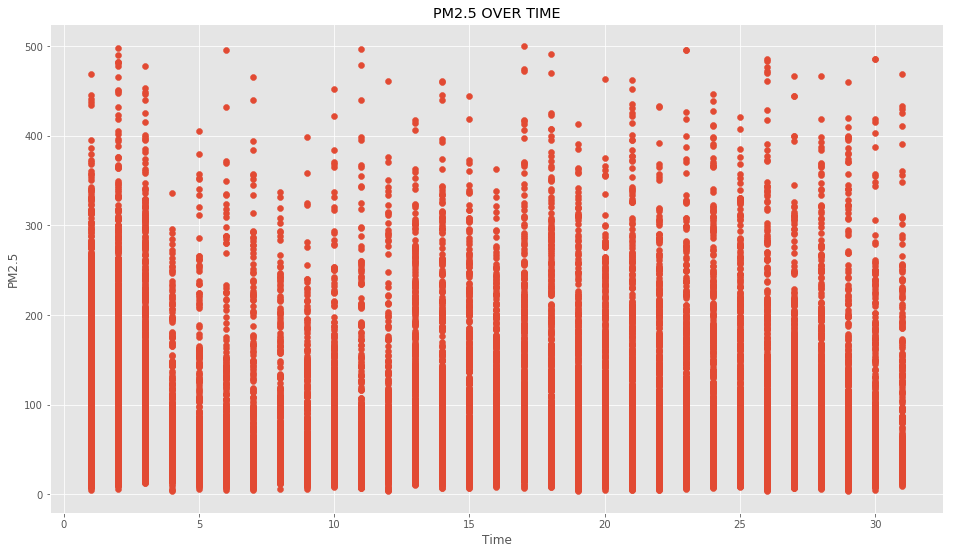

In [11]:
x=df['Day']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER TIME")
plt.show()

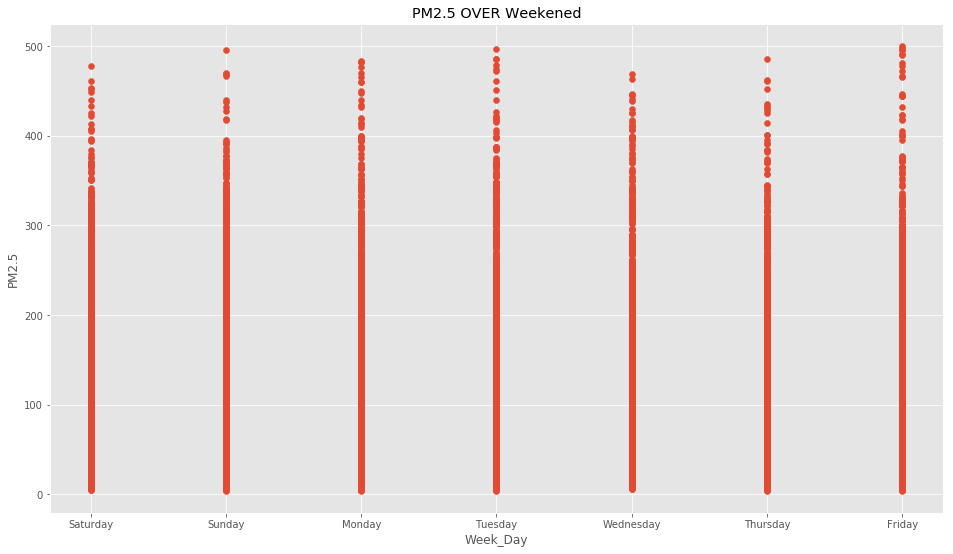

In [16]:
x=df['Week_Day']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Week_Day")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER Weekened")
plt.show()

In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

Date               0
Time               0
SO2             5858
NO             10112
NO2             6066
NOX             6223
CO             12162
O3              9203
PM25            3247
PM10            2879
Temperature      589
RH               587
Solar Rad       3064
BP              3523
Rain           11514
Year               0
Month              0
Day                0
Week_Day           0
dtype: int64

In [14]:
df.isnull().sum().sum()

75027

Data Import and Checking Part End.Now Time to Resolve observed Misisng Data

At First I,notice from Last Column, So "Rain", we know that rain always won't happen, so replace all NaN value with Zero , that will be more convenient construction

In [15]:
df["Rain"]=df["Rain"].replace(np.NaN,0)

Check whether all NaN replaced or not.

In [16]:
df.isnull().sum()  #Done

Date               0
Time               0
SO2             5858
NO             10112
NO2             6066
NOX             6223
CO             12162
O3              9203
PM25            3247
PM10            2879
Temperature      589
RH               587
Solar Rad       3064
BP              3523
Rain               0
Year               0
Month              0
Day                0
Week_Day           0
dtype: int64

Now It's Time to Reconstruct BP,Solar Rad,Tempature,PN10,PM2.5,O3,CO,NOX,NO2,NO,SO2 with a innovative and rebust technique called INTERPOLATE. with the help of Interpolate we can calculate missing value between two value using Forward method,BackWard Method or Both.It has also couple of parameter to use,but I just use one.

In [17]:
df["SO2"]=df["SO2"].interpolate(limit_direction='both')
df["NO"]=df["NO"].interpolate(limit_direction='both')
df["NO2"]=df["NO2"].interpolate(limit_direction='both')
df["NOX"]=df["NOX"].interpolate(limit_direction='both')
df["CO"]=df["CO"].interpolate(limit_direction='both')
df["O3"]=df["O3"].interpolate(limit_direction='both')
df["PM25"]=df["PM25"].interpolate(limit_direction='both')
df["PM10"]=df["PM10"].interpolate(limit_direction='both')
df["Temperature"]=df["Temperature"].interpolate(limit_direction='both')
df["RH"]=df["RH"].interpolate(limit_direction='both')
df["Solar Rad"]=df["Solar Rad"].interpolate(limit_direction='both')
df["BP"]=df["BP"].interpolate(limit_direction='both')





In [136]:
df.isnull().sum() #Finally Resolve all missing data

Date           0
Time           0
SO2            0
NO             0
NO2            0
NOX            0
CO             0
O3             0
PM25           0
PM10           0
Temperature    0
RH             0
Solar Rad      0
BP             0
Rain           0
Year           0
Month          0
Day            0
Week_Day       0
dtype: int64

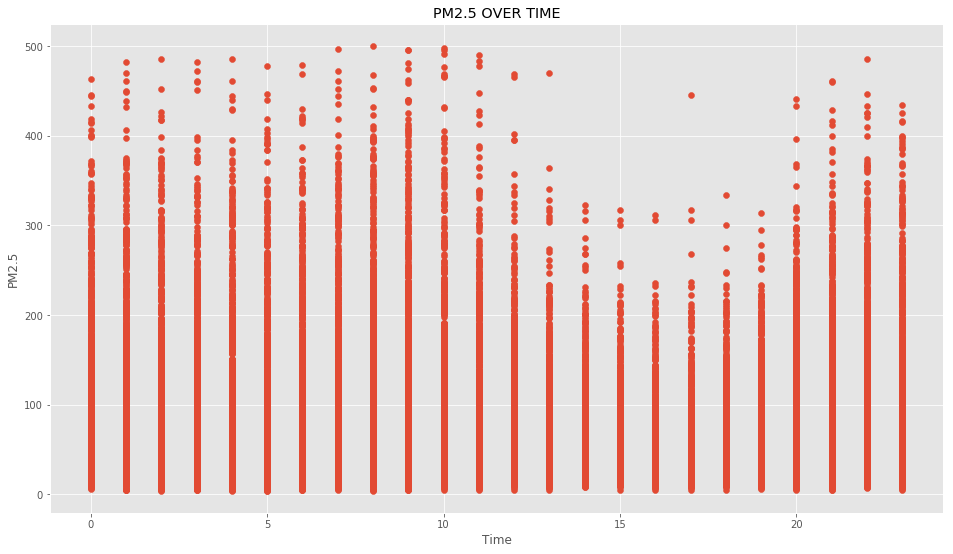

In [18]:
x=df['Time']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER TIME")
plt.show()

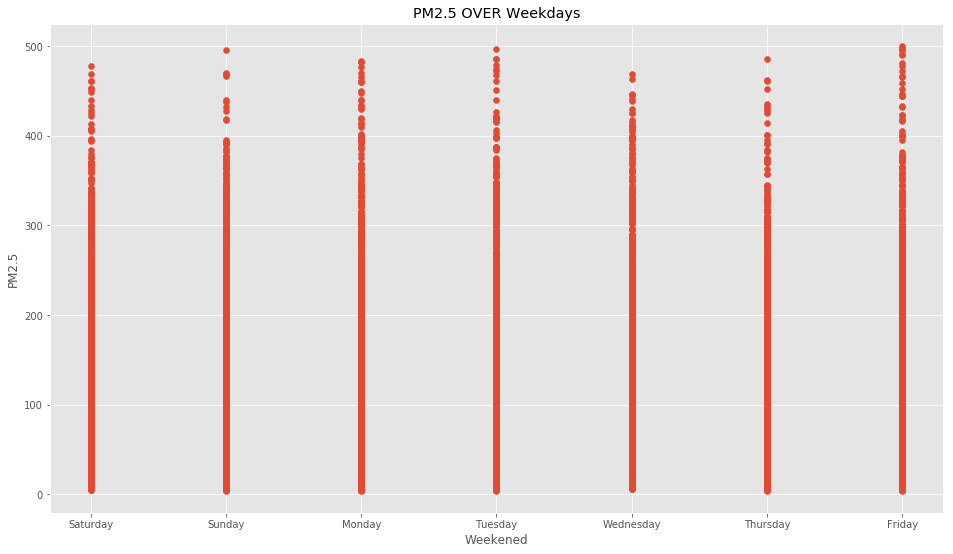

In [29]:
x=df['Week_Day']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Weekened")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER Weekdays")
plt.show()

In [19]:
def t_series(start,end):
    time_series=df[['Date','PM25']][(df['Date'] >= start) & (df['Date'] <= end)]
    x=time_series.Date
    y=time_series.PM25
    plt.plot(x,y)
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Values')
    plt.title('PM2.5 Time Series')
    return plt.show();


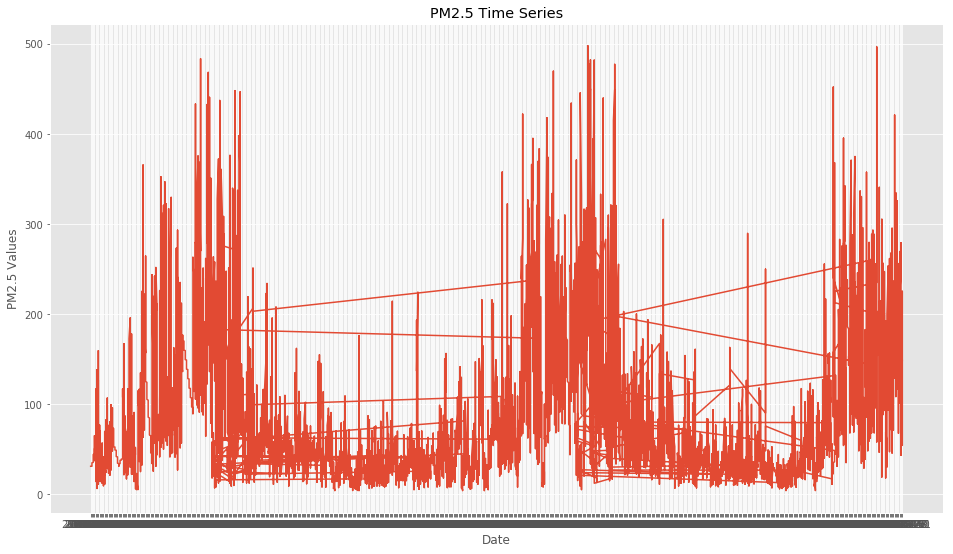

In [113]:
t_series('2016','2019')

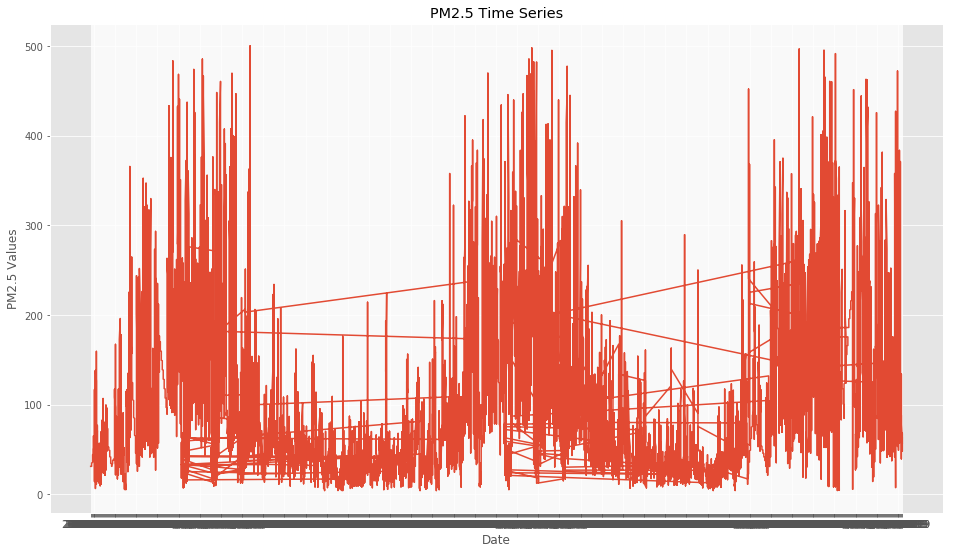

In [114]:
t_series('1/3/2019','31/3/2019')

In [20]:
df.describe()

,Time,SO2,NO,NO2,NOX,CO,O3,PM25,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day
count,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000
mean,11.500000,12.898888,30.917651,14.426361,41.150003,2.890227,5.384702,95.119190,169.297474,25.973035,67.476796,272.995641,1008.438319,1.060524,2017.496711,6.945175,15.299342
std,6.922345,12.735645,49.258577,14.112019,54.989231,1.244127,11.770057,81.679794,140.870247,4.849425,16.015459,342.708862,5.778498,2.856306,0.805693,3.558993,9.253902
min,0.000000,0.050000,0.050000,0.050000,0.050000,0.050000,0.120000,4.010000,9.020000,9.450000,14.460000,5.520000,967.800000,0.000000,2016.000000,1.000000,1.000000
25%,5.750000,3.390000,3.874000,5.040000,8.260000,2.050000,1.202276,35.458750,71.765000,22.120000,51.970000,8.130000,1004.030000,0.000000,2017.000000,4.000000,7.000000
50%,11.500000,10.000000,13.174165,10.250000,23.116627,2.896548,1.871901,65.980000,127.980000,26.890000,70.020000,64.690000,1009.290000,0.000000,2017.000000,7.000000,16.000000
75%,17.250000,18.110000,39.530638,20.250000,54.351779,3.744025,4.067528,132.172500,220.000313,29.520000,81.390000,494.810000,1013.640000,0.040000,2018.000000,10.000000,23.000000
max,23.000000,251.720000,398.900000,227.160000,398.930000,11.250000,100.570000,500.190000,947.000000,37.520000,97.090000,1000.900000,1020.810000,16.000000,2019.000000,12.000000,31.000000


Seems all data range, min,max value etc are quite acceptable. They are all in Range

Now See the Corelation Between Dataset Columns

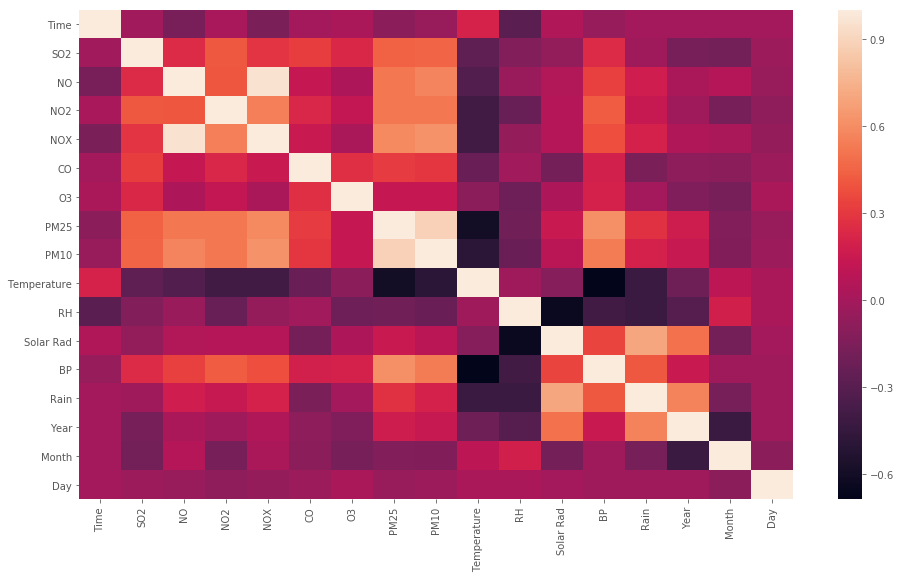

In [21]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [22]:
df['day_week_cat'] = df.Week_Day.astype("category").cat.codes #Catagory week_day like encoding

In [23]:
df = df.drop(['Week_Day'], axis=1) #after that no need of Week_day

In [24]:
df.head()

,Date,Time,SO2,NO,NO2,NOX,CO,O3,PM25,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day,day_week_cat
0,2016-10-01,1,0.57,13.840,9.22,23.06,1.76,1.12,31.0,124.34,29.48,80.56,7.99,1006.15,0.00,2016,10,1,2
1,2016-10-01,2,0.29,17.450,11.89,29.34,1.67,1.03,31.0,69.42,29.01,82.86,8.06,1006.05,0.00,2016,10,1,2
2,2016-10-01,3,0.07,12.930,6.20,19.13,1.60,1.13,31.0,83.36,28.84,83.68,8.19,1006.01,0.02,2016,10,1,2
3,2016-10-01,4,0.08,9.690,0.92,10.61,1.54,1.05,31.0,60.51,28.75,84.18,8.18,1006.14,0.00,2016,10,1,2
4,2016-10-01,5,0.07,15.718,1.31,1.97,1.48,0.99,31.0,43.51,28.53,85.12,8.20,1006.36,0.00,2016,10,1,2


In [25]:
df.dtypes

Date             object
Time              int64
SO2             float64
NO              float64
NO2             float64
NOX             float64
CO              float64
O3              float64
PM25            float64
PM10            float64
Temperature     float64
RH              float64
Solar Rad       float64
BP              float64
Rain            float64
Year              int64
Month             int64
Day               int64
day_week_cat       int8
dtype: object

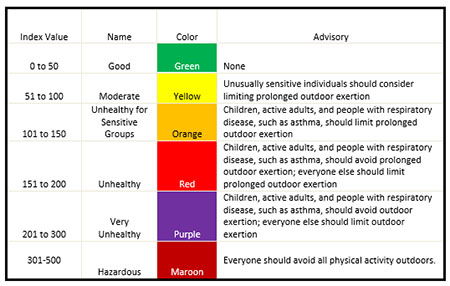

In [46]:
#from IPython.display import Image
#Image(filename='pic.jpg')

In [26]:
df['Value_cat'] = pd.cut(df.loc[:,'PM25'],[-50,12.0,35.4,55.4,150.4,250.4,1000],labels=[1,2,3,4,5,6])

In [27]:
df = df.drop(['Date', 'PM25'], axis=1)

In [28]:
df.head()

,Time,SO2,NO,NO2,NOX,CO,O3,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day,day_week_cat,Value_cat
0,1,0.57,13.840,9.22,23.06,1.76,1.12,124.34,29.48,80.56,7.99,1006.15,0.00,2016,10,1,2,2
1,2,0.29,17.450,11.89,29.34,1.67,1.03,69.42,29.01,82.86,8.06,1006.05,0.00,2016,10,1,2,2
2,3,0.07,12.930,6.20,19.13,1.60,1.13,83.36,28.84,83.68,8.19,1006.01,0.02,2016,10,1,2,2
3,4,0.08,9.690,0.92,10.61,1.54,1.05,60.51,28.75,84.18,8.18,1006.14,0.00,2016,10,1,2,2
4,5,0.07,15.718,1.31,1.97,1.48,0.99,43.51,28.53,85.12,8.20,1006.36,0.00,2016,10,1,2,2


Split into Training and Test Data¶

Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

In [29]:
y = df['Value_cat']

In [30]:
X = df.drop(['Value_cat'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)

In [32]:
X_train.shape, y_train.shape

((17510, 17), (17510,))

In [33]:
X_test.shape, y_test.shape

((4378, 17), (4378,))

                                   Multiclass logistic regression




In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# Create logistic regression object
log_regr = LogisticRegression()

In [35]:
# Train the model using the training sets
log_regr.fit(X_train, y_train)

/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# Score the model
logistic_regression_score = log_regr.score(X_test, y_test)
logistic_regression_score

0.6267702147099132

In [37]:
# Make predictions using the testing set
log_regr_pred = log_regr.predict(X_test)

In [38]:
log_regr_prob = log_regr.predict_proba(X_test)

In [39]:
confusion_log_regr = confusion_matrix(y_test, log_regr_pred)

In [40]:
confusion_log_regr

array([[   0,   87,    1,    0,    0,    2],
       [   1,  879,   15,  111,    1,    1],
       [   0,  296,  101,  378,    0,    0],
       [   2,   59,   87, 1369,   68,    4],
       [   1,    0,    1,  369,  250,   43],
       [   0,    0,    0,   36,   71,  145]])

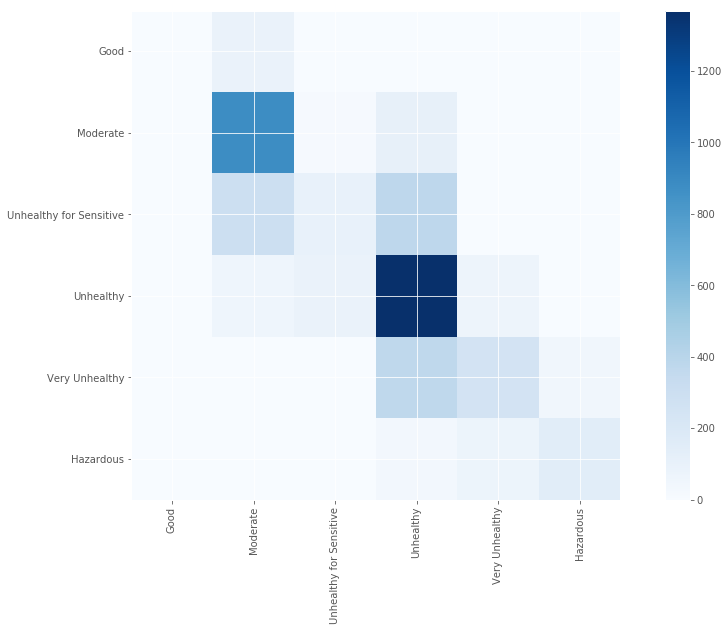

In [42]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_log_regr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest Regressor object
rf = RandomForestClassifier()

In [44]:
# Train the model using the training sets
rf.fit(X_train, y_train)

/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
# Score the model
rf_score = rf.score(X_test, y_test)
rf_score

0.793741434444952

In [46]:
# Make predictions using the testing set
rf_pred = rf.predict(X_test)

In [47]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_pred)

In [48]:
confusion_rf

array([[  45,   43,    0,    0,    1,    1],
       [  16,  888,   87,   15,    1,    1],
       [   0,  152,  472,  149,    2,    0],
       [   0,   13,  128, 1382,   63,    3],
       [   0,    0,    1,  114,  507,   42],
       [   2,    0,    0,    5,   64,  181]])

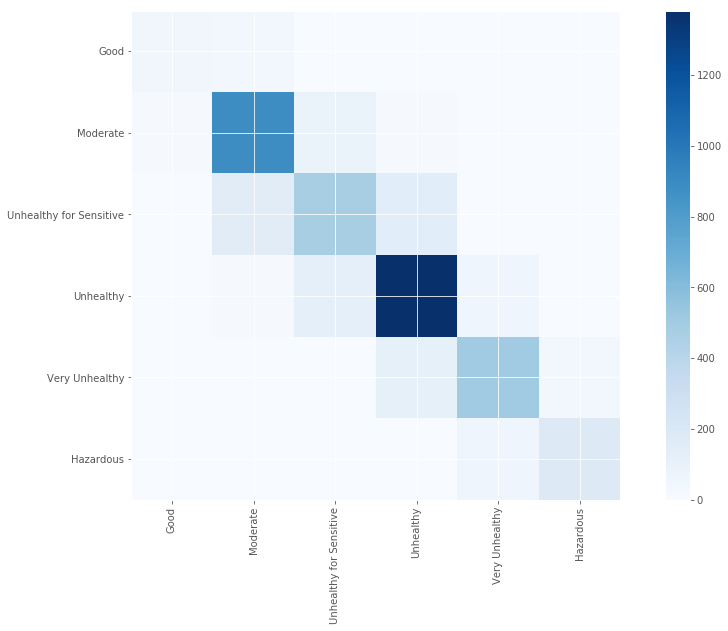

In [49]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [50]:
print("Classification models:")
print("Logistic regression score: ", logistic_regression_score)
print("Random forest score: ", rf_score)


Classification models:
Logistic regression score:  0.6267702147099132
Random forest score:  0.793741434444952


In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Create decision tree object with adaboost

tree = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=300, learning_rate=.1)

In [53]:
# Train the model using the training sets
tree.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=300, random_state=None)

In [54]:
# Score the decision tree model
tree_score = tree.score(X_test, y_test)
tree_score

0.7316126084970306

In [55]:
# Make predictions using the testing set
tree_pred = tree.predict(X_test)

In [56]:
# Calculate confusion matrix
confusion_tree = confusion_matrix(y_test, tree_pred)

In [57]:
confusion_tree

array([[  47,   40,    1,    0,    2,    0],
       [  45,  766,  151,   45,    1,    0],
       [   2,  161,  434,  174,    3,    1],
       [   1,   20,  168, 1296,   98,    6],
       [   1,    1,    6,  121,  480,   55],
       [   7,    0,    0,   10,   55,  180]])

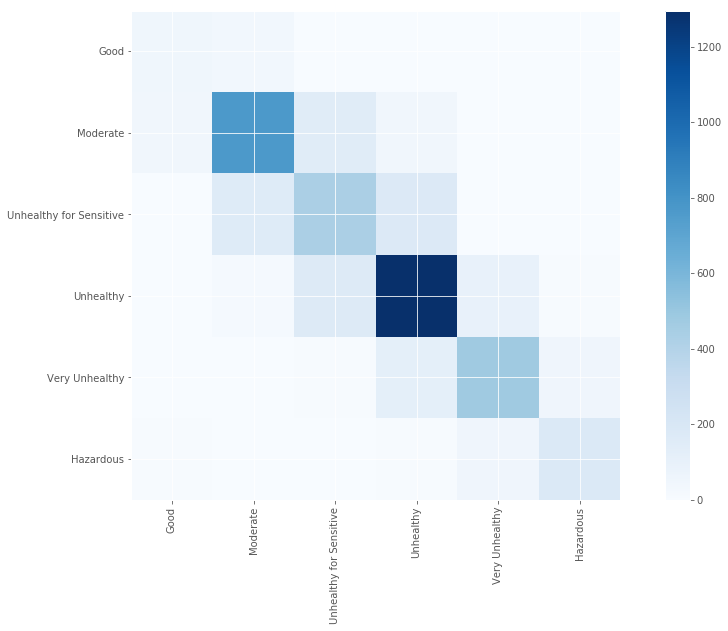

In [58]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_tree, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=1234)

In [60]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
# Score the model
multiclass_neural_network_score = mlp.score(X_test, y_test)
multiclass_neural_network_score

0.7265874828688899

In [62]:
# Make predictions using the testing set
mnn_pred = mlp.predict(X_test)

In [63]:
# Calculate confusion matrix
confusion_mnn = confusion_matrix(y_test,mnn_pred)

In [64]:
confusion_mnn

array([[   0,   87,    1,    0,    0,    2],
       [   0,  892,   92,   21,    2,    1],
       [   0,  253,  351,  167,    4,    0],
       [   0,   29,  161, 1274,  119,    6],
       [   0,    0,    0,  116,  481,   67],
       [   0,    0,    0,    9,   60,  183]])

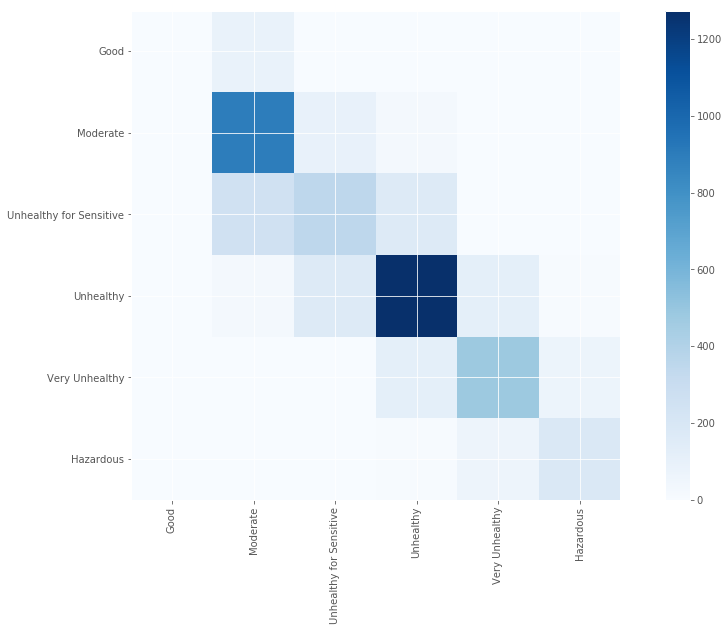

In [65]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_mnn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [66]:
print(classification_report(y_test, mnn_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        90
           2       0.71      0.88      0.79      1008
           3       0.58      0.45      0.51       775
           4       0.80      0.80      0.80      1589
           5       0.72      0.72      0.72       664
           6       0.71      0.73      0.72       252

   micro avg       0.73      0.73      0.73      4378
   macro avg       0.59      0.60      0.59      4378
weighted avg       0.71      0.73      0.71      4378



/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
print("Classification models:")
print("Multiclass neural network score: ", multiclass_neural_network_score)
print("Logistic regression score: ", logistic_regression_score)
print("Random forest score: ", rf_score)
print("Decision tree score: ", tree_score)

Classification models:
Multiclass neural network score:  0.7265874828688899
Logistic regression score:  0.6267702147099132
Random forest score:  0.793741434444952
Decision tree score:  0.7316126084970306
